In [1]:
from weldx import Trace, LinearHorizontalTraceSegment, Q_, GenericSeries
from weldx.core import SpatialSeries
from xarray import DataArray

In [2]:
lhts = LinearHorizontalTraceSegment("2mm")

In [3]:
tr_1 = Trace(lhts)

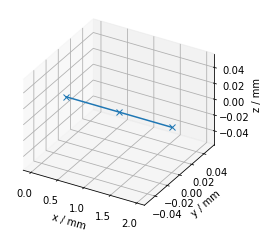

In [4]:
tr_1.plot()

In [5]:
class SDTraceSegment:
    def __init__(self, sd):
        self._sd = sd

In [6]:
expr = "a*s+b"
#expr = "x+y+z"
params = dict(
    a= DataArray(Q_([1,0,0], "mm"), dims=["c"], coords=dict(c=["x", "y", "z"])), 
    b= DataArray(Q_([0,1,0], "mm"), dims=["c"], coords=dict(c=["x", "y", "z"])),
)
sps = SpatialSeries(expr, parameters=params)

In [7]:
sdts = SDTraceSegment(sps)

In [8]:
sps.evaluate(s="1")

{'s': <xarray.DataArray (s: 1)>
<Quantity([1], 'dimensionless')>
Dimensions without coordinates: s}
{'c': {'values': ['x', 'y', 'z']}, 's': {'dimensionality': ''}}


KeyError: "Could not find required coordinate 's'."